In [1]:
%load_ext autoreload
%autoreload 2

from msr.deeplearning.datasets import MimicDataset
from msr.deeplearning.datamodules import MimicDataModule

TARGET = "sbp_dbp_avg"
SPLITS = ["train", "val", "test"]

---
# **Whole signal**

**`whole_signal_waveforms`**

PtbXLDataModule (whole_signal_waveforms)
  info       = {0: 'CD', 1: 'HYP', 2: 'MI', 3: 'NORM', 4: 'STTC'}

  Train PtbXLDataset:
    data_shape            = torch.Size([12978, 1000, 12])
    classes_counts        = {'NORM': 7254, 'MI': 2048, 'STTC': 1907, 'CD': 1353, 'HYP': 416}

  Val PtbXLDataset:
    data_shape            = torch.Size([1642, 1000, 12])
    classes_counts        = {'NORM': 916, 'STTC': 256, 'MI': 234, 'CD': 172, 'HYP': 64}

  Test PtbXLDataset:
    data_shape            = torch.Size([1652, 1000, 12])
    classes_counts        = {'NORM': 913, 'MI': 256, 'STTC': 243, 'CD': 184, 'HYP': 56}


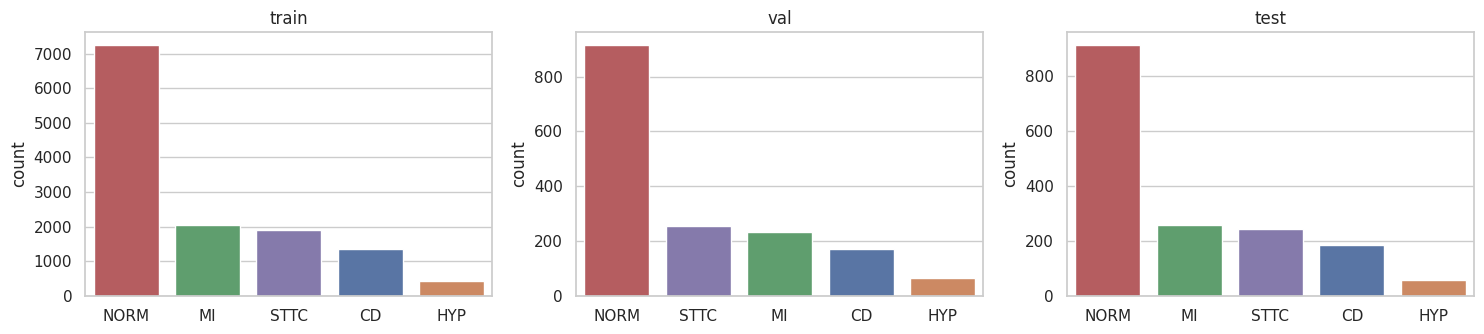

In [67]:
dm = MimicDataModule("whole_signal_waveforms", **BASE_PARAMS)
dm.setup(); dm.plot_targets(); print(dm.describe(ds_fields=['data_shape', 'classes_counts'], dm_fields=['info']))

**`whole_signal_features`**

In [82]:
dm = MimicDataModule("whole_signal_features", **BASE_PARAMS)
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

PtbXLDataModule (whole_signal_features)
  
  Train PtbXLDataset:
    data_shape            = torch.Size([12978, 697])

  Val PtbXLDataset:
    data_shape            = torch.Size([1642, 697])

  Test PtbXLDataset:
    data_shape            = torch.Size([1652, 697])


---
# **Windows**

**`windows_waveforms`**

In [69]:
dm = MimicDataModule("windows_waveforms", **BASE_PARAMS)
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

PtbXLDataModule (windows_waveforms)
  
  Train PtbXLDataset:
    data_shape            = torch.Size([12978, 3, 600, 12])

  Val PtbXLDataset:
    data_shape            = torch.Size([1642, 3, 600, 12])

  Test PtbXLDataset:
    data_shape            = torch.Size([1652, 3, 600, 12])


**`windows_features`**

In [70]:
dm = MimicDataModule("windows_features", **BASE_PARAMS)
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

PtbXLDataModule (windows_features)
  
  Train PtbXLDataset:
    data_shape            = torch.Size([12978, 3, 696])

  Val PtbXLDataset:
    data_shape            = torch.Size([1642, 3, 696])

  Test PtbXLDataset:
    data_shape            = torch.Size([1652, 3, 696])


---
# **Beats**

**`beats_waveforms`**

In [71]:
dm = MimicDataModule("beats_waveforms", **BASE_PARAMS)
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

PtbXLDataModule (beats_waveforms)
  
  Train PtbXLDataset:
    data_shape            = torch.Size([12978, 7, 100, 12])

  Val PtbXLDataset:
    data_shape            = torch.Size([1642, 7, 100, 12])

  Test PtbXLDataset:
    data_shape            = torch.Size([1652, 7, 100, 12])


**`beats_features`**

In [72]:
dm = MimicDataModule("beats_features", **BASE_PARAMS)
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

PtbXLDataModule (beats_features)
  
  Train PtbXLDataset:
    data_shape            = torch.Size([12978, 7, 600])

  Val PtbXLDataset:
    data_shape            = torch.Size([1642, 7, 600])

  Test PtbXLDataset:
    data_shape            = torch.Size([1652, 7, 600])


---
# **Aggregated beat**

**`agg_beat_waveforms`**

In [73]:
dm = MimicDataModule("agg_beat_waveforms", **BASE_PARAMS)
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

PtbXLDataModule (agg_beat_waveforms)
  
  Train PtbXLDataset:
    data_shape            = torch.Size([12978, 100, 12])

  Val PtbXLDataset:
    data_shape            = torch.Size([1642, 100, 12])

  Test PtbXLDataset:
    data_shape            = torch.Size([1652, 100, 12])


**`agg_beat_features`**

In [74]:
dm = MimicDataModule("agg_beat_features", **BASE_PARAMS)
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

PtbXLDataModule (agg_beat_features)
  
  Train PtbXLDataset:
    data_shape            = torch.Size([12978, 600])

  Val PtbXLDataset:
    data_shape            = torch.Size([1642, 600])

  Test PtbXLDataset:
    data_shape            = torch.Size([1652, 600])


---

In [37]:
from msr.data.raw.mimic import RAW_TENSORS_DATA_PATH, load_tensor
from msr.signals.representation_extractor import PeriodicRepresentationExtractor
from msr.data.measurements import MimicMeasurement
import numpy as np

idx = 11418

data = load_tensor(RAW_TENSORS_DATA_PATH / "train.pt")
sample = data[idx]
sample.shape

m = MimicMeasurement(sample.T.numpy(), FS)
m.set_beats(source_channel="ecg")
m.set_windows(win_len_s=20, step_s=18)
m.set_agg_beat()

re = PeriodicRepresentationExtractor(m)